<a href="https://colab.research.google.com/github/Nazneen-akram/coursera-rep/blob/main/LinkedIN_Job_Postings_2023_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the Kaggle API client
!pip install -q kaggle

In [2]:

# Upload the Kaggle API token
from google.colab import files
files.upload()  # Choose the kaggle.json file that you downloaded

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nazneenakram","key":"08d579900181a0e53c4bac39e23b069d"}'}

In [3]:

# Make directory named kaggle, copy kaggle.json file there, and change the permissions of the file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Check if everything's okay by listing the datasets
!kaggle datasets list


ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          17373        372  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28           9448        236  1.0              
victorahaji/worlds-air-quality-and-water-pollution-dataset  World's Air Quality and Water Pollution Dataset     58KB  2023-10-30 12:37:47           1358         32  0.9411765        
amirmahdiabbootalebi/salary-by-job-title-and-country        Salary by Job Title and C

In [7]:

# To download a specific dataset
!kaggle datasets download -d arshkon/linkedin-job-postings

 84% 18.0M/21.5M [00:00<00:00, 184MB/s]
100% 21.5M/21.5M [00:00<00:00, 198MB/s]


In [8]:
# Unzip the data and remove the zip file. we have added two folders
!unzip \*.zip  && rm *.zip

Archive:  linkedin-job-postings.zip
replace company_details/companies.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: company_details/companies.csv  
replace company_details/company_industries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: company_details/company_industries.csv  
replace company_details/company_specialities.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: company_details/company_specialities.csv  
replace company_details/employee_counts.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: company_details/employee_counts.csv  
replace job_details/benefits.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: job_details/benefits.csv  
replace job_details/job_industries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: job_details/job_industries.csv  
replace job_details/job_skills.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: job_details/job_skills.csv  
replace job_postings.csv? [y]es, [n]o, [A]ll, [N]one, [r]e

In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load the job_postings.csv dataset
job_postings = pd.read_csv('job_postings.csv')
job_skills = pd.read_csv('job_details/job_skills.csv')

In [41]:
# Display the first few rows of the dataset
job_postings.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1708301126000,NaN,NaN,NaN,1692749193000,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1695426553000,NaN,NaN,NaN,1692834553000,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1695321872000,NaN,NaN,NaN,1692729872000,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1695424007000,NaN,NaN,NaN,1692832007000,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1708419602000,NaN,NaN,NaN,1692867714000,NaN,1,FULL_TIME,NaN,NaN


In [42]:
# Display the summary statistics of the dataset
job_postings.describe(include='all')

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
count,1.588600e+04,1.552000e+04,15886,15885,5.521000e+03,981.000000,5521.000000,6502,15886,15886,...,1.588600e+04,9.280000e+02,10984,144,1.588600e+04,9044,15886.000000,15886,6502,6502
unique,NaN,NaN,10956,13855,NaN,NaN,NaN,3,7,3010,...,NaN,NaN,6,141,NaN,1296,NaN,7,1,1
top,NaN,NaN,Sales Director [Owner/Operator],The Entrepreneur we seek is an experienced sal...,NaN,NaN,NaN,YEARLY,Full-time,United States,...,NaN,NaN,Mid-Senior level,EducationBachelors or better in Education or r...,NaN,jobs.smartrecruiters.com,NaN,FULL_TIME,USD,BASE_SALARY
freq,NaN,NaN,83,78,NaN,NaN,NaN,3955,12844,1133,...,NaN,NaN,5083,4,NaN,203,NaN,12844,6502,6502
mean,3.691293e+09,1.084100e+07,NaN,NaN,8.833622e+04,41167.664404,62352.218073,NaN,NaN,NaN,...,1.696385e+12,1.692793e+12,NaN,NaN,1.692768e+12,NaN,0.289248,NaN,NaN,NaN
std,1.028617e+08,2.313688e+07,NaN,NaN,9.068282e+04,93682.094905,59487.692283,NaN,NaN,NaN,...,3.453813e+09,3.712983e+07,NaN,NaN,1.036804e+08,NaN,0.453428,NaN,NaN,NaN
min,8.500877e+07,1.009000e+03,NaN,NaN,1.000000e+01,10.000000,10.000000,NaN,NaN,NaN,...,1.694271e+12,1.692644e+12,NaN,NaN,1.691672e+12,NaN,0.000000,NaN,NaN,NaN
25%,3.693071e+09,1.301100e+04,NaN,NaN,4.800000e+01,18.000000,38.000000,NaN,NaN,NaN,...,1.695328e+12,1.692750e+12,NaN,NaN,1.692735e+12,NaN,0.000000,NaN,NaN,NaN
50%,3.697358e+09,2.777685e+05,NaN,NaN,8.200000e+04,26.000000,60000.000000,NaN,NaN,NaN,...,1.695338e+12,1.692803e+12,NaN,NaN,1.692744e+12,NaN,0.000000,NaN,NaN,NaN
75%,3.699413e+09,7.798499e+06,NaN,NaN,1.400000e+05,52000.000000,99000.000000,NaN,NaN,NaN,...,1.695426e+12,1.692818e+12,NaN,NaN,1.692831e+12,NaN,1.000000,NaN,NaN,NaN


In [43]:
# Display the shape of the DataFrame
print(f'The DataFrame has {job_postings.shape[0]} rows and {job_postings.shape[1]} columns.')

The DataFrame has 15886 rows and 27 columns.


In [44]:
# Display the data types of all columns
job_postings.dtypes

job_id                          int64
company_id                    float64
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time            int64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                          int64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                     int64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       object
compensation

In [45]:
# Create a DataFrame with the count of null and non-null values
null_value_count = job_postings.isnull().sum()
non_null_count = job_postings.notnull().sum()

df_nulls = pd.DataFrame({'null_value_count': null_value_count, 'non_null_count': non_null_count})

# Sort the DataFrame by descending order of null_value_count
df_nulls = df_nulls.sort_values(by='null_value_count', ascending=False)

# Display the DataFrame
df_nulls

,null_value_count,non_null_count
skills_desc,15742,144
closed_time,14958,928
med_salary,14905,981
remote_allowed,13546,2340
max_salary,10365,5521
min_salary,10365,5521
compensation_type,9384,6502
currency,9384,6502
pay_period,9384,6502
applies,7186,8700


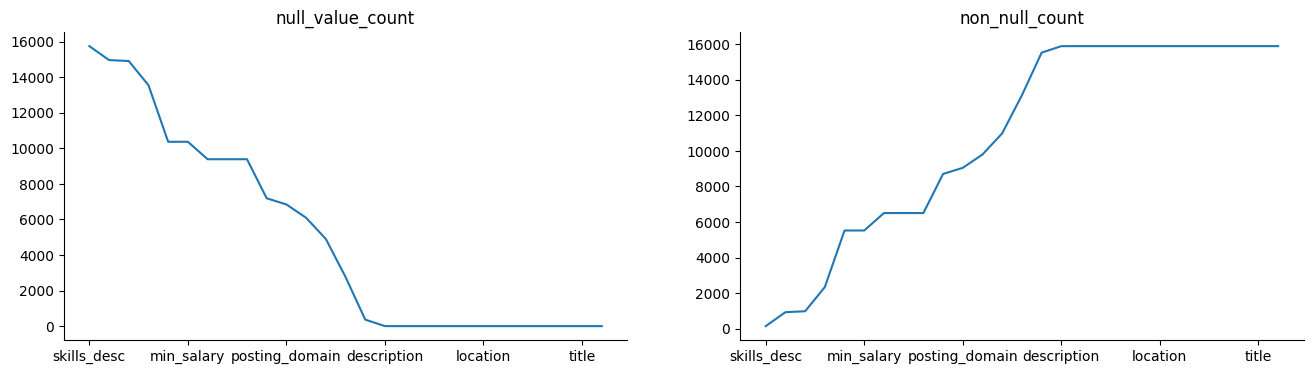

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Plot null_value_count
df_nulls['null_value_count'].plot(kind='line', ax=axs[0], title='null_value_count')
axs[0].spines[['top', 'right']].set_visible(False)

# Plot non_null_count
df_nulls['non_null_count'].plot(kind='line', ax=axs[1], title='non_null_count')
axs[1].spines[['top', 'right']].set_visible(False)

plt.show()

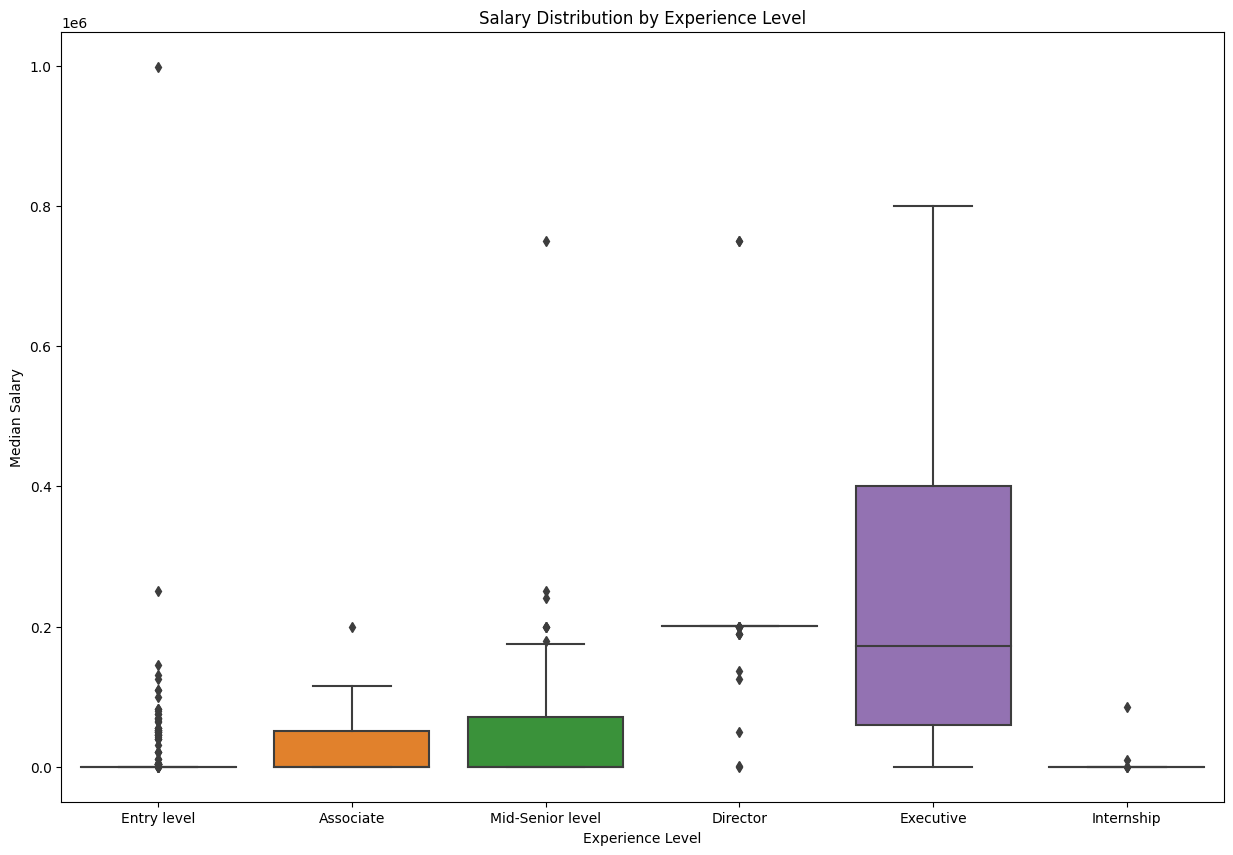

In [47]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='formatted_experience_level', y='med_salary', data=job_postings)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary')
plt.show()

1.   **Entry Level and Internship:**The KDE plots for both Entry Level and Internship positions show a peak at the lower end of the salary range, indicating that most positions at these levels offer salaries in this range. There are a few outliers at the higher end, indicating that some positions offer higher salaries. It’s interesting to note that the salary distributions for Entry Level and Internship positions are similar.

2. **Associate:** The KDE plot for Associate positions shows a peak at the lower end of the salary range, but it’s less pronounced than the Entry Level and Internship plots. This suggests that while most Associate positions offer salaries in the lower range, there’s more variation in salary compared to Entry Level and Internship positions.

3. **Mid-Senior Level:** The KDE plot for Mid-Senior Level positions shows a distribution that’s more spread out compared to Entry Level, Internship, and Associate positions. This indicates a wider range of salaries for Mid-Senior Level positions, with a significant number of positions offering higher salaries.

4. **Director:** The KDE plot for Director positions shows a distribution that’s even more spread out, indicating a wide range of salaries. There’s a significant number of Director positions that offer high salaries, with a few outliers at the very high end of the salary range.

5. **Executive:** The KDE plot for Executive positions shows a peak at the higher end of the salary range, indicating that most Executive positions offer high salaries. There are a few outliers at the lower end, suggesting that some Executive positions offer lower salaries.

In [50]:
job_skills.head()

,job_id,skill_abr
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT


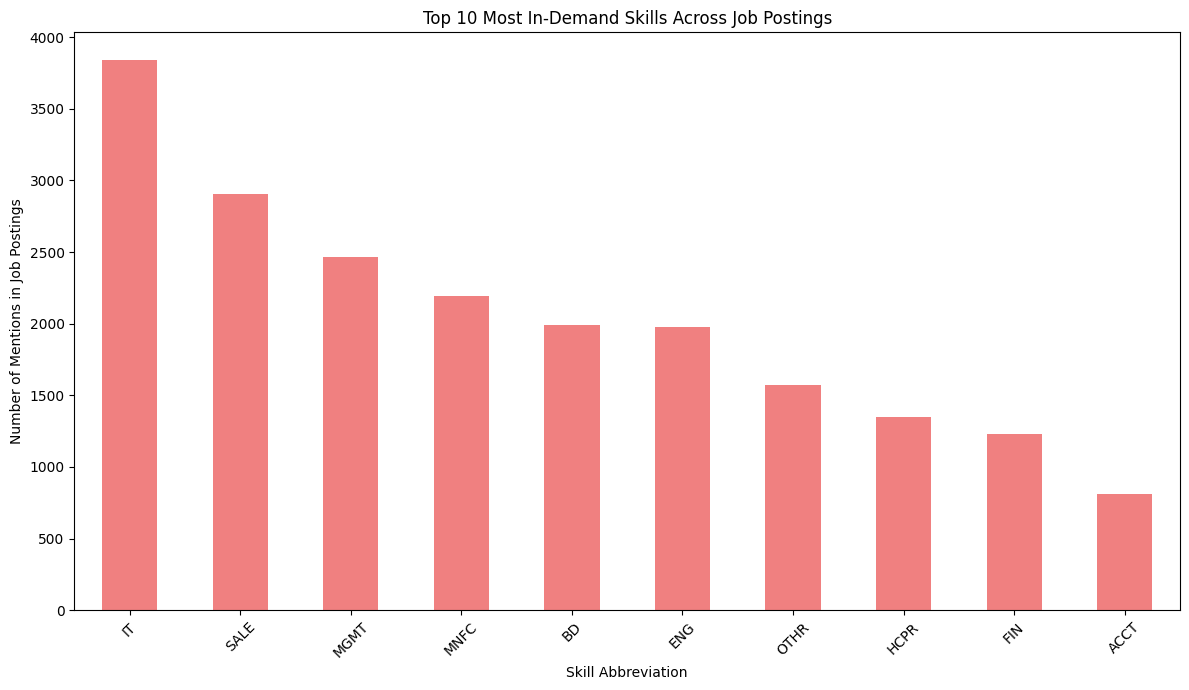

In [52]:
# Most in-demand skills across job postings using the correct column
top_skills = job_skills['skill_abr'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 7))
top_skills.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most In-Demand Skills Across Job Postings')
plt.xlabel('Skill Abbreviation')
plt.ylabel('Number of Mentions in Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

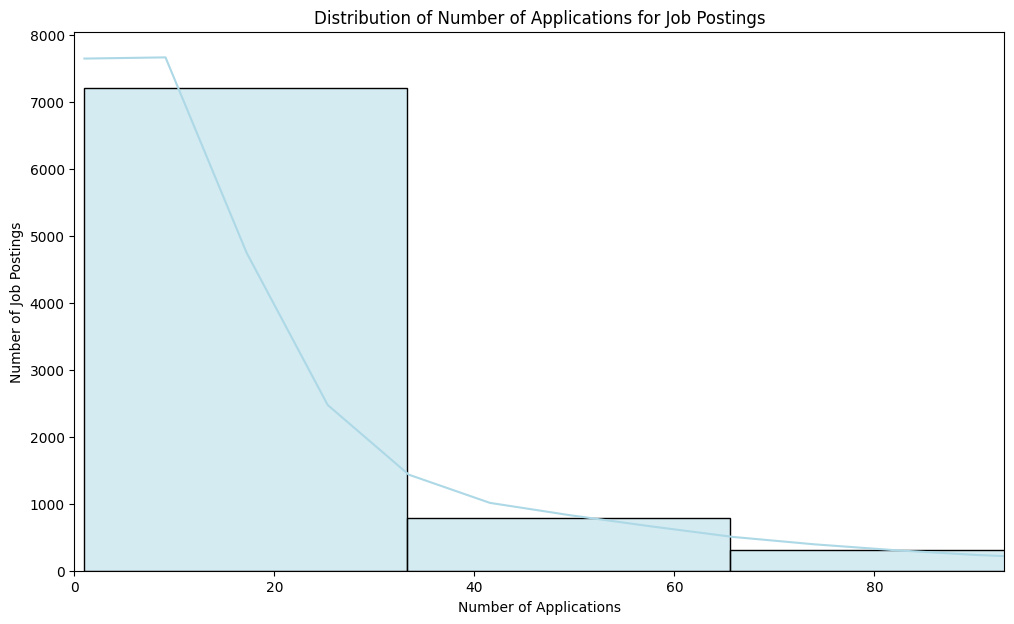

title
Junior Software Engineer                                                                     1615.0
Scrum Master / Project Manager (Healthcare/Call Center) - 100% Remote                         832.0
Power BI Data Analyst – (Remote)                                                              742.0
Data Scientist – (Remote)                                                                     577.0
Executive Assistant - Global Programs - Non-profit - US Eastern Time Zone Candidates Only     554.0
Head of Information Technology                                                                532.0
Manager, Workforce Management (Remote)                                                        486.0
Talent Acquisition Manager                                                                    478.0
National Recruiter - $5,000 Sign on Bonus!                                                    473.0
Payment Posting Specialist                                                                    

In [53]:
# Distribution of the number of applications for job postings
plt.figure(figsize=(12, 7))
sns.histplot(job_postings['applies'], bins=50, color='lightblue', kde=True)
plt.title('Distribution of Number of Applications for Job Postings')
plt.xlabel('Number of Applications')
plt.ylabel('Number of Job Postings')
plt.xlim(0, job_postings['applies'].quantile(0.95))  # Limiting to 95th percentile for better visualization
plt.show()

# Top job titles that receive the highest number of applications
top_titles_by_applications = job_postings.groupby('title')['applies'].mean().sort_values(ascending=False).head(10)
top_titles_by_applications